# Airbnb reviews

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

### import data

In [3]:
reviews = pd.read_csv('../project-capstone/Capstone DATA/Berlin/reviews.csv')
listings = pd.read_csv('../project-capstone/Capstone DATA/Berlin/listings.csv')


In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427683 entries, 0 to 427682
Data columns (total 6 columns):
listing_id       427683 non-null int64
id               427683 non-null int64
date             427683 non-null object
reviewer_id      427683 non-null int64
reviewer_name    427683 non-null object
comments         427147 non-null object
dtypes: int64(3), object(3)
memory usage: 19.6+ MB


In [6]:
reviews_data_dict = {
        'listing_id'      :'int64. id of the listing the review is associated to' ,
        'id'              :'int64. id of the review',
        'date'            :'string. Date of the review',
        'reviewer_id'     :'int64. unique identifier',
        'reviewer_name'   :'String. first name of the reviewer',
        'comments'        :'string. contains the text of the review'
}

In [7]:
reviews_data_dict

{'listing_id': 'int64. id of the listing the review is associated to',
 'id': 'int64. id of the review',
 'date': 'string. Date of the review',
 'reviewer_id': 'int64. unique identifier',
 'reviewer_name': 'String. first name of the reviewer',
 'comments': 'string. contains the text of the review'}

In [8]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [9]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-1

In [10]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_pri

Count the Null reviews per month

In [11]:
listings.isna().sum()

id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                   59
summary                               963
space                                8532
description                           203
experiences_offered                     0
neighborhood_overview               11012
notes                               15337
transit                              9516
access                              11715
interaction                         12146
house_rules                         11103
thumbnail_url                       22552
medium_url                          22552
picture_url                             0
xl_picture_url                      22552
host_id                                 0
host_url                                0
host_name                              26
host_since                             26
host_location                     

In [12]:
Data_dictionary={
    'id':'integer id number for the property'
    ,'listing_url' :'url string'
    ,'scrape_id':'id number of the data scrape. Will not be required for analysis'
    ,'last_scraped':'datetime of last website scrape. Will not be required for analysis'
    ,'name':'string Property name'
    ,'summary':'string. Brief decription of the property'
    ,'space':'string. Brief description of the space'
    ,'description':'string. detailed description of the property/space'
    ,'experiences_offered':'None type, or list. Berlin contains all None.'
    ,'neighborhood_overview':' string. description of the neighbourhood'
    ,'notes':'string. additional notes'
    ,'transit':'string. describes local transport options'
    ,'access' :'string. descrpiption of access to the property'
    ,'interaction':'string. how the host interacts with the guests'
    ,'house_rules':'string. list of house rules'
    ,'thumbnail_url':'string. url of the host thumbnail picture'
    ,'medium_url':'string. url of the host thumbnail picture'
    ,'picture_url':'string. url of the host picture'
    ,'xl_picture_url':'string. url of the picture'
    ,'host_id':'int. id of the host'
    ,'host_url'                          :'string'
    ,'host_name'                         :'string. First name of the Host'
    ,'host_since'                        :'string. date host joined Airbnb'
    ,'host_location'                     :'string'
    ,'host_about'                        :'string. brief description of the host'
    ,'host_response_time'                :'int'
    ,'host_response_rate'                :'float'
    ,'host_acceptance_rate'              :'float'
    ,'host_is_superhost'                 :'bool'
    ,'host_thumbnail_url'                :'string'
    ,'host_picture_url'                  :'string'
    ,'host_neighbourhood'                :'string'
    ,'host_listings_count'               :'float'
    ,'host_total_listings_count'         :'float'
    ,'host_verifications'                :'list'
    ,'host_has_profile_pic'              :'bool'
    ,'host_identity_verified'            :'bool'
    ,'street'                            :'string. Street the property is located on'
    ,'neighbourhood'                     :'string. neighbourhood'
    ,'neighbourhood_cleansed'            :'string'
    ,'neighbourhood_group_cleansed'      :'string. cleaned so that it conforms to a list of general neighbourhoods'
    ,'city'                              :'string'
    ,'state'                             :'string'
    ,'zipcode'                           :'int'
    ,'market'                            :'string'
    ,'smart_location'                    :'string'
    ,'country_code'                      :'string'
    ,'country'                           :'float. country'
    ,'latitude'                          :'float. geolocation identifier'
    ,'longitude'                         :'float. geolocation identifier'
    ,'is_location_exact'                 :'bool'
    ,'property_type'                     :'string. type of accomadation.[entire apartment, private room, shared room]'
    ,'room_type'                         :'string'
    ,'accommodates'                      :'int. number of people who can stay'
    ,'bathrooms'                         :'int. number of bathrooms'
    ,'bedrooms'                          :'int. number of bedrooms'
    ,'beds'                              :'int. number of beds'
    ,'bed_type'                          :'string. list of types of beds'
    ,'amenities'                         :'list of available amenities in the property'
    ,'square_feet'                       :'int'
    ,'price'                             :'string'
    ,'weekly_price'                      :'string'
    ,'monthly_price'                     :'string'
    ,'security_deposit'                  :'string'
    ,'cleaning_fee'                      :'string'
    ,'guests_included'                   :'int'
    ,'extra_people'                      :'string'
    ,'minimum_nights'                    :'int'
    ,'maximum_nights'                    :'int'
    ,'calendar_updated'                  :'int'
    ,'has_availability'                  :'bool'
    ,'availability_30'                   :'int'
    ,'availability_60'                   :'int'
    ,'availability_90'                   :'int'
    ,'availability_365'                  :'int'
    ,'calendar_last_scraped'             :'string'
    ,'number_of_reviews'                 :'int'
    ,'first_review'                      :'string'
    ,'last_review'                       :'string'
    ,'review_scores_rating'              :'int'
    ,'review_scores_accuracy'            :'int'
    ,'review_scores_cleanliness'         :'int'
    ,'review_scores_checkin'             :'int'
    ,'review_scores_communication'       :'int'
    ,'review_scores_location'            :'int'
    ,'review_scores_value'               :'int'
    ,'requires_license'                  :'bool'
    ,'license'                           :'int'
    ,'jurisdiction_names'                :'string'
    ,'instant_bookable'                  :'bool'
    ,'is_business_travel_ready'          :'bool'
    ,'cancellation_policy'               :'string'
    ,'require_guest_profile_picture'     :'bool'
    ,'require_guest_phone_verification'  :'bool'
    ,'calculated_host_listings_count'    :'int'
    ,'reviews_per_month':  'float'
}

In [13]:
Data_dictionary

{'id': 'integer id number for the property',
 'listing_url': 'url string',
 'scrape_id': 'id number of the data scrape. Will not be required for analysis',
 'last_scraped': 'datetime of last website scrape. Will not be required for analysis',
 'name': 'string Property name',
 'summary': 'string. Brief decription of the property',
 'space': 'string. Brief description of the space',
 'description': 'string. detailed description of the property/space',
 'experiences_offered': 'None type, or list. Berlin contains all None.',
 'neighborhood_overview': ' string. description of the neighbourhood',
 'notes': 'string. additional notes',
 'transit': 'string. describes local transport options',
 'access': 'string. descrpiption of access to the property',
 'interaction': 'string. how the host interacts with the guests',
 'house_rules': 'string. list of house rules',
 'thumbnail_url': 'string. url of the host thumbnail picture',
 'medium_url': 'string. url of the host thumbnail picture',
 'picture_

I will drop all the rows with null values in any of the review columns. I will drop the square_feet, weekly_price, monthly_price, security_deposit, cleaning_fee, license, requires_license and jurisdiction_names columns entirely. All host_<> columns except the host id and name will be droped. name will be kept to help with cleaning of the reviews.

other "object" type columns with nan will be filled with blank strings ("").

listings(rows) with nan bathrooms, bedrooms and beds will be dropped

In [14]:
listings.street.value_counts()[:20]

Berlin, Berlin, Germany                   22317
Berlin, Germany                              72
., Berlin, Germany                           12
Schöneberg, Berlin, Germany                  11
Mitte, Berlin, Germany                        8
Berlin, Schleswig-Holstein, Germany           7
Berlin , Berlin, Germany                      6
*, Berlin, Germany                            6
Berlin, Mitte, Germany                        5
Berlin, Germany, Germany                      4
berlin, Berlin, Germany                       4
DE, Germany                                   3
Berlin - Mitte, Germany                       3
Berlin , Germany                              3
Kleinmachnow, Brandenburg, Germany            3
Weissensee, Berlin, Germany                   3
Friedrichshain, Berlin, Germany               3
Berlin-Wilmersdorf, Berlin, Germany           3
Berlin, Berlin, DE, Berlin, Germany           2
Berlin-Friedrichshain, Berlin, Germany        2
Name: street, dtype: int64

In [15]:
listings.neighbourhood.value_counts()[:20]

Neukölln           3209
Prenzlauer Berg    2768
Kreuzberg          2661
Friedrichshain     2526
Mitte              1943
Wedding            1417
Schöneberg         1065
Moabit              778
Charlottenburg      767
Wilmersdorf         483
Pankow              281
Tempelhof           254
Rummelsburg         248
Weißensee           195
Lichtenberg         174
Tiergarten          163
Alt-Treptow         156
Steglitz            153
Reinickendorf       139
Westend             117
Name: neighbourhood, dtype: int64

In [16]:
listings.neighbourhood_cleansed.value_counts()[:20]

Tempelhofer Vorstadt        1325
Frankfurter Allee Süd FK    1282
Alexanderplatz              1091
Reuterstraße                1002
Rixdorf                      880
Neuköllner Mitte/Zentrum     797
Brunnenstr. Süd              773
Frankfurter Allee Nord       735
Schillerpromenade            662
südliche Luisenstadt         643
Prenzlauer Berg Nordwest     623
Prenzlauer Berg Südwest      618
Schöneberg-Nord              567
Prenzlauer Berg Süd          555
Wedding Zentrum              517
Moabit West                  490
nördliche Luisenstadt        484
Schöneberg-Süd               474
Helmholtzplatz               459
Prenzlauer Berg Nord         411
Name: neighbourhood_cleansed, dtype: int64

In [17]:
listings.neighbourhood_group_cleansed.value_counts()

Friedrichshain-Kreuzberg    5497
Mitte                       4631
Pankow                      3541
Neukölln                    3499
Charlottenburg-Wilm.        1592
Tempelhof - Schöneberg      1560
Lichtenberg                  688
Treptow - Köpenick           595
Steglitz - Zehlendorf        437
Reinickendorf                247
Marzahn - Hellersdorf        141
Spandau                      124
Name: neighbourhood_group_cleansed, dtype: int64

In [18]:
listings.market.value_counts()

Berlin                   22483
Other (International)        2
Leipzig                      1
Zurich                       1
New York                     1
Juarez                       1
Name: market, dtype: int64

Drop this column as it does not contain any usefull identifiers. City, state, smart_location, country, country_code, is_location_exact and neighbourhood will be dropped

Rows to drop if nan contained

In [19]:
listings.dropna(subset=['beds', 'bedrooms','bathrooms','number_of_reviews', 'first_review', 'last_review', 
                        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                        'review_scores_value','reviews_per_month'], 
                axis=0,
                how='any',
                inplace=True)

Columns to drop

In [20]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_pri

In [21]:
listings_clean = listings.drop(columns=['calendar_last_scraped', 'calculated_host_listings_count','street','city', 'state','zipcode',
               'smart_location', 'country', 'country_code', 'is_location_exact', 'neighbourhood',
               'neighbourhood_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license', 
               'requires_license', 'jurisdiction_names','market','scrape_id','last_scraped','thumbnail_url',
               'medium_url','picture_url','xl_picture_url','host_url','host_name','host_since',
               'host_location','host_about','host_response_time','host_response_rate','host_acceptance_rate',
               'host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count', 
               'host_has_profile_pic','host_identity_verified','calendar_updated','experiences_offered'],axis=1).copy()

In [22]:
listings_clean.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_is_superhost,host_total_listings_count,host_verifications,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",2217,t,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00,$200.00,$30.00,1,$28.00,4,1125,t,0,21,51,141,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,f,f,3.76
1,2695,https://www.airbnb.com/rooms/2695,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,2986,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00,$0.00,$0.00,1,$0.00,2,40,t,0,0,0,0,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,f,f,1.42
2,3176,https://www.airbnb.com/rooms/3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",3718,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",Pankow,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00,$200.00,$50.00,2,$20.00,62,1125,t,0,0,0,220,143,2009-06-20,2017-03-20,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,f,strict_14_with_grace_period,f,f,1.25
3,3309,https://www.airbnb.com/rooms/3309,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,"My flat is in the middle of West-Berlin, direc...",The flat is a strictly non-smoking facility! A...,The public transportation is excellent: Severa...,I do have a strictly non-smoker-flat. Keep th...,I'm working as a freelancing photographer. My ...,House-Rules and Information ..............(deu...,4108,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$26.00,$250.00,$30.00,1,$18.00,5,360,t,0,0,22,297,25,2013-08-12,2018-08-16,88.0,9.0,9.0,9.

columns to fill with a blank string

In [23]:
cols_to_fill_blank =['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 
                     'notes', 'transit', 'access', 'interaction', 'house_rules']
blank_dict = {i:"" for i in cols_to_fill_blank}

In [24]:
listings_clean.fillna(blank_dict, inplace=True)

In [25]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18055 entries, 0 to 22424
Data columns (total 55 columns):
id                                  18055 non-null int64
listing_url                         18055 non-null object
name                                18055 non-null object
summary                             18055 non-null object
space                               18055 non-null object
description                         18055 non-null object
neighborhood_overview               18055 non-null object
notes                               18055 non-null object
transit                             18055 non-null object
access                              18055 non-null object
interaction                         18055 non-null object
house_rules                         18055 non-null object
host_id                             18055 non-null int64
host_is_superhost                   18042 non-null object
host_total_listings_count           18042 non-null float64
host_verifications    

In [26]:
columns_to_bin = ['host_is_superhost','has_availability','instant_bookable','is_business_travel_ready',
                  'require_guest_profile_picture','require_guest_phone_verification']
bin_dict = {i:{'f':0,'t':1} for i in columns_to_bin}               

In [27]:
listings_clean.replace(bin_dict,inplace=True)

In [28]:
price_cols =['price','security_deposit','cleaning_fee','extra_people']

Columns to fill with 0

In [29]:
listings_clean[price_cols]=listings_clean[price_cols].apply(lambda x: x.str.replace('$',"").replace(',',""))

In [30]:
listings_clean[price_cols]=listings_clean[price_cols].apply(pd.to_numeric,errors='coerce')

In [31]:
type(listings_clean.price[20])

numpy.float64

In [32]:
listings_clean.dropna(subset=['price'],inplace=True,axis=0)

In [33]:
cols_to_fill_0=['security_deposit', 'cleaning_fee','host_total_listings_count',
                'host_verifications','host_is_superhost','security_deposit','cleaning_fee','extra_people']
zero_dict = {i:0.0 for i in cols_to_fill_0}

In [34]:
listings_clean.fillna(zero_dict,inplace=True)

In [35]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18037 entries, 0 to 22424
Data columns (total 55 columns):
id                                  18037 non-null int64
listing_url                         18037 non-null object
name                                18037 non-null object
summary                             18037 non-null object
space                               18037 non-null object
description                         18037 non-null object
neighborhood_overview               18037 non-null object
notes                               18037 non-null object
transit                             18037 non-null object
access                              18037 non-null object
interaction                         18037 non-null object
house_rules                         18037 non-null object
host_id                             18037 non-null int64
host_is_superhost                   18037 non-null float64
host_total_listings_count           18037 non-null float64
host_verifications   

In [36]:
listings_clean.host_verifications[23]

"['email', 'phone', 'facebook', 'reviews', 'jumio', 'government_id']"

Convert the dates to datetime

In [37]:
listings_clean[['first_review','last_review']]=listings_clean[['first_review','last_review']].apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d"))

In [38]:
listings_clean['last_to_first_review']=listings_clean.last_review-listings_clean.first_review

In [39]:
listings_clean.reset_index(inplace=True)

Extract from http://insideairbnb.com/about.html :

"Inside Airbnb's "San Francisco Model" uses a modified methodology as follows:

A Review Rate of 50% is used to convert reviews to estimated bookings.
Alex Marqusee uses a review rate of 72%, however this is attributed to an unreliable source: Airbnb's CEO and co-founder Brian Chesky.

The Budget and Legislative Analyst's Office (page 49) also use a value 72% for their review rate, and in addition, introduce a higher impact model using a review rate of 30.5% - based on comparing public data of reviews to the The New York Attorney General’s report on Airbnb released in October 2014.

Inside Airbnb analysis found that using a review rate 30.5% is more fact based, however probably not conservative enough, given that the Budget and Legislative Analyst's Office did not take into account missing reviews because of deleted listings. A review rate of 72% is unverifiable - therefore 50% was chosen as it sits almost exactly between 72% and 30.5%.

An average length of stay is configured for each city, and this, multiplied by the estimated bookings for each listing over a period gives the occupancy rate

Where statements have been made about the average length of stay of Airbnb guests for a city, this was used.

For example, Airbnb reported 5.5 nights as the average length of stay for guests using Airbnb in San Francisco.

Where no public statements were made about average stays, a value of 3 nights per booking was used.

If a listing has a higher minimum nights value than the average length of stay, the minimum nights value was used instead.

The occupancy rate was capped at 70% - a relatively high, but reasonable number for a highly occupied "hotel".
This controls for situations where an Airbnb host might change their minimum nights during the high season, without the review data having a chance to catch up; or for a listing with a very high review rate.
It also ensures that the occupancy model remains conservative."

Occupancy rate will be detirmined based on an average length of stay in berlin of 2.4 days as per the report by Deloite from 2016. A review conversion rate of 50% has been adopted to allow for people who stay but don't leave a review.

https://www2.deloitte.com/content/dam/Deloitte/de/Documents/consumer-business/Hotelmarkt_Berlin_EN_safe.pdf

In [40]:
conversion_rate = 0.5
avg_len_stay = 2.4

In [41]:
occupancy_rate = listings_clean.reviews_per_month * avg_len_stay/conversion_rate

In [42]:
occupancy_rate.idxmax()

16678

In [43]:
occupancy_rate[:10]

0    18.048
1     6.816
2     6.000
3     1.872
4     8.400
5     0.720
6     1.104
7     2.256
8    13.584
9     3.600
Name: reviews_per_month, dtype: float64

In [44]:
listings_clean[['listing_url', 'number_of_reviews', 'last_to_first_review']].loc[occupancy_rate.idxmax()]

listing_url             https://www.airbnb.com/rooms/26970536
number_of_reviews                                          88
last_to_first_review                         71 days 00:00:00
Name: 16678, dtype: object

There is an issue here where there are more reviews than the number number of days between the first and last review. people may be reviewing the wrong property, there may be multiple rooms with the same listing, or people are only staying for one night. 

Reviews can be left up to 14 days after checkout so there could be more reviews than days, although in the above case there are still too many reviews.  

In [45]:
occupancy_rate[occupancy_rate>30][:20]

303     30.192
438     30.864
1555    31.776
1628    30.144
1955    30.768
1956    30.480
2011    31.776
2066    81.648
2233    30.144
3143    31.488
3291    30.576
3386    37.248
3729    33.552
3941    33.024
4010    31.968
4239    38.784
4338    31.296
4561    30.768
4598    34.272
4606    33.072
Name: reviews_per_month, dtype: float64

In [46]:
occupancy_rate[occupancy_rate>30].count()

253

There are 253 listings with an occupancy rate greater than 30. looking at the listings it appears that this is because of the review conversion rate of 50%. I will restrict the occupancy rate to 30.

In [47]:
list_min = listings_clean.minimum_nights

In [48]:
list_min[:10]

0     4
1     2
2    62
3     5
4     2
5     6
6    90
7    60
8     3
9     3
Name: minimum_nights, dtype: int64

In [49]:
occupancy_rate = pd.Series([min(30,x* avg_len_stay/conversion_rate)
                  if x>=list_min[i] 
                  else min(30,x* list_min[i]/conversion_rate)
                  for i,x 
                  in listings_clean.reviews_per_month.iteritems()])

In [50]:
occupancy_rate[:10]

0    30.00
1     5.68
2    30.00
3     3.90
4     7.00
5     1.80
6    30.00
7    30.00
8    16.98
9     4.50
dtype: float64

In [51]:
occupancy_rate.max()

30.0

In [52]:
occupancy_rate.describe()

count    18037.000000
mean         7.255079
std          8.284747
min          0.040000
25%          1.080000
50%          3.800000
75%         10.848000
max         30.000000
dtype: float64

In [53]:
listings_clean[['listing_url', 'number_of_reviews', 'last_to_first_review']].loc[occupancy_rate.idxmin()]

listing_url             https://www.airbnb.com/rooms/41306
number_of_reviews                                        1
last_to_first_review                       0 days 00:00:00
Name: 31, dtype: object

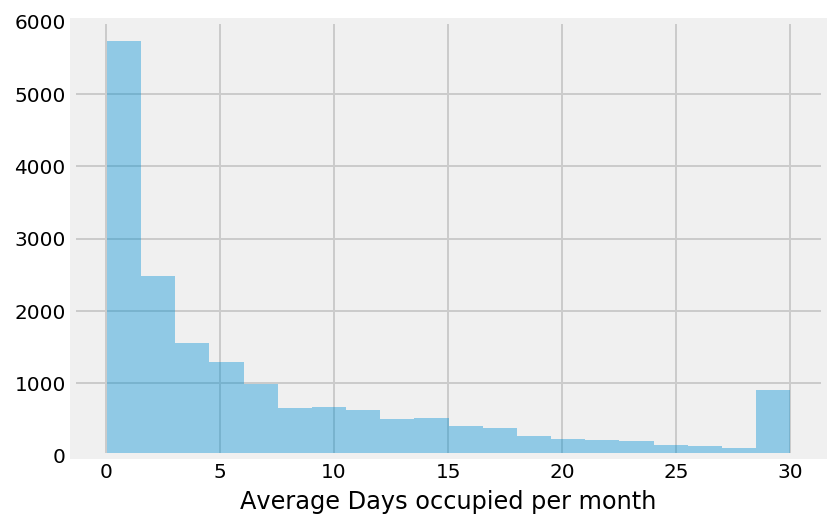

In [54]:
sns.distplot(occupancy_rate, bins=20,kde=False, axlabel='Average Days occupied per month');

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


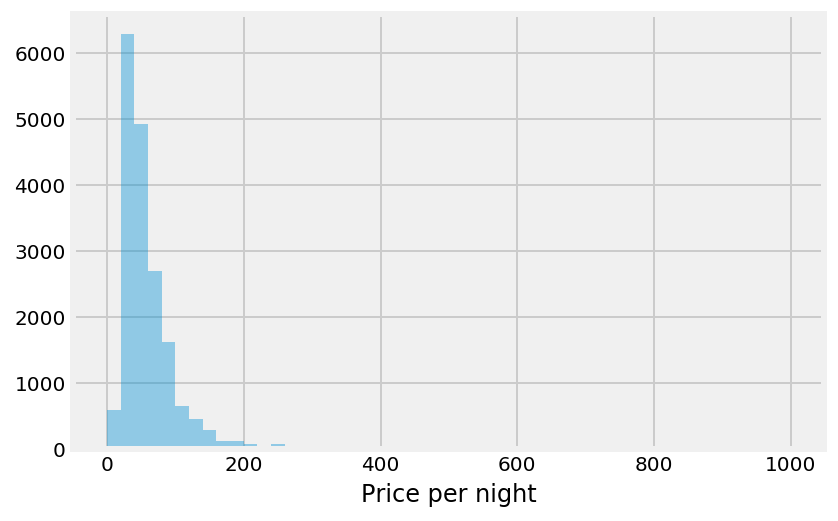

In [55]:
sns.distplot(listings_clean.price,kde=False,axlabel = 'Price per night');

In [56]:
listings_clean.sort_values(by='review_scores_rating').head()

,index,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_is_superhost,host_total_listings_count,host_verifications,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,last_to_first_review
4888,5764,8216321,https://www.airbnb.com/rooms/8216321,Feelhome Berlin,Lightened big flat with a balcony which gives ...,Nealry 100 squaremeter ligthened apartment wit...,Lightened big flat with a balcony which gives ...,You'll stay in the artsy fartsy center in berl...,,The public transports here are super nice and ...,Beside the music/producing room you can use ev...,If you have questions I'll be there for you wh...,"Be nice, so I'm nice too. :)",37400612,0.0,1.0,"['email', 'phone']",Friedrichshain-Kreuzberg,52.513417,13.450657,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",70.0,0.0,20.0,1,20.0,1,3,1,0,0,0,0,4,2015-09-10,2015-11-02,20.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0,flexible,0,0,0.10,53 days
11064,13305,19385418,https://www.airbnb.com/rooms/19385418,Schönes zimmer für max. 2 personen,"Cosy appartement with kitchen, bathroom and sl...",,"Cosy appartement with kitchen, bathroom and sl...",,One room of my appartment is rent to someone a...,Close to the train station Julius Leber Brücke...,The rentable room is in a two-room-appartment.,Per (Hidden by Airbnb) + (Phone number hidden ...,The price is for one person and one night ! Fo...,135890457,0.0,1.0,"['email', 'phone', 'facebook']",Tempelhof - Schöneberg,52.480884,13.359114,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Smoking allowed"",""Pets allow...",26.0,200.0,20.0,1,55.0,1,30,1,30,60,90,90,2,2017-06-26,2018-07-03,20.0,2.0,4.0,2.0,8.0,6.0,2.0,0,0,flexible,0,0,0.12,372 days
15880,19280,25532256,https://www.airbnb.com/rooms/25532256,Beautiful studio with garden & Wifi,"This studio, located in Berlin, is ideal for 4...","This studio, located in Berlin, is ideal for 4...","This studio, located in Berlin, is ideal for 4...",This studio enjoys a privileged location that ...,WE LOVE • The large garden • The Wifi connecti...,How to get there : • Air: Berlin - Tagel airpo...,,,,31898183,0.0,378.0,"['email', 'phone', 'reviews', 'manual_offline'...",Spandau,52.535418,13.184281,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Pets allowed"",Heating,...",87.0,100.0,0.0,1,0.0,2,1125,1,0,0,0,95,2,2018-06-13,2018-08-05,20.0,2.0,2.0,2.0,2.0,2.0,2.0,1,0,strict_14_with_grace_period,0,0,0.41,53 days
5555,6626,9606268,https://www.airbnb.com/rooms/9606268,ruhige 2-Raum-Wohnung in F`hain,"Hallo liebe Suchende, ich biete euch eine 2-Ra...",,"Hallo liebe Suchende, ich biete euch eine 2-Ra...",,,,,,,49706106,0.0,1.0,"['email', 'phone']",Friedrichshain-Kreuzberg,52.511299,13.474015,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Kitchen,""Pets allowed"",""Buzzer/wireless inter...",25.0,0.0,0.0,1,0.0,1,1125,1,0,0,0,0,1,2015-11-27,2015-11-27,20.0,4.0,4.0,6.0,2.0,6.0,2.0,0,0,flexible,0,0,0.03,0 days
6147,7462,10940863,https://www.airbnb.com/rooms/10940863,Designer's Flat Kreuzberg,"Hey everybody, i do will rent out a room in my...",,"Hey everybody, i do will rent out a room in my...",,,,,,,19429204,0.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Friedrichshain-Kreuzberg,52.487035,13.385466,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{In

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


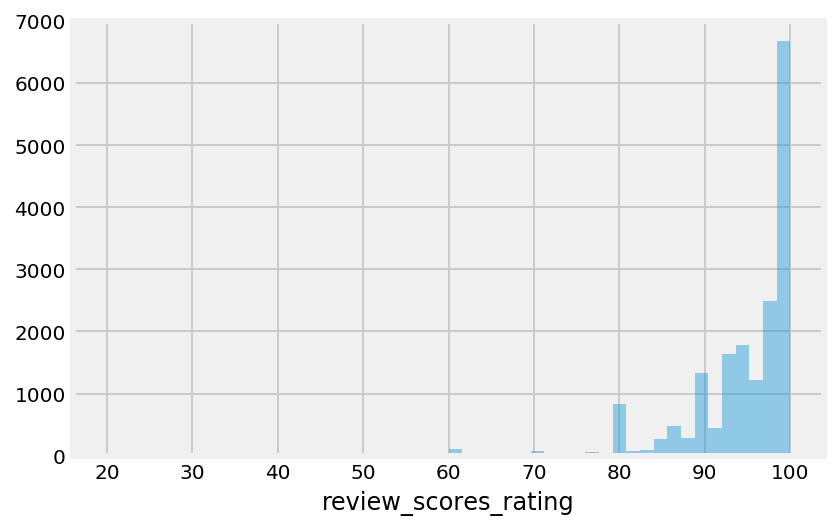

In [57]:
sns.distplot(listings_clean.review_scores_rating,kde=False);

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


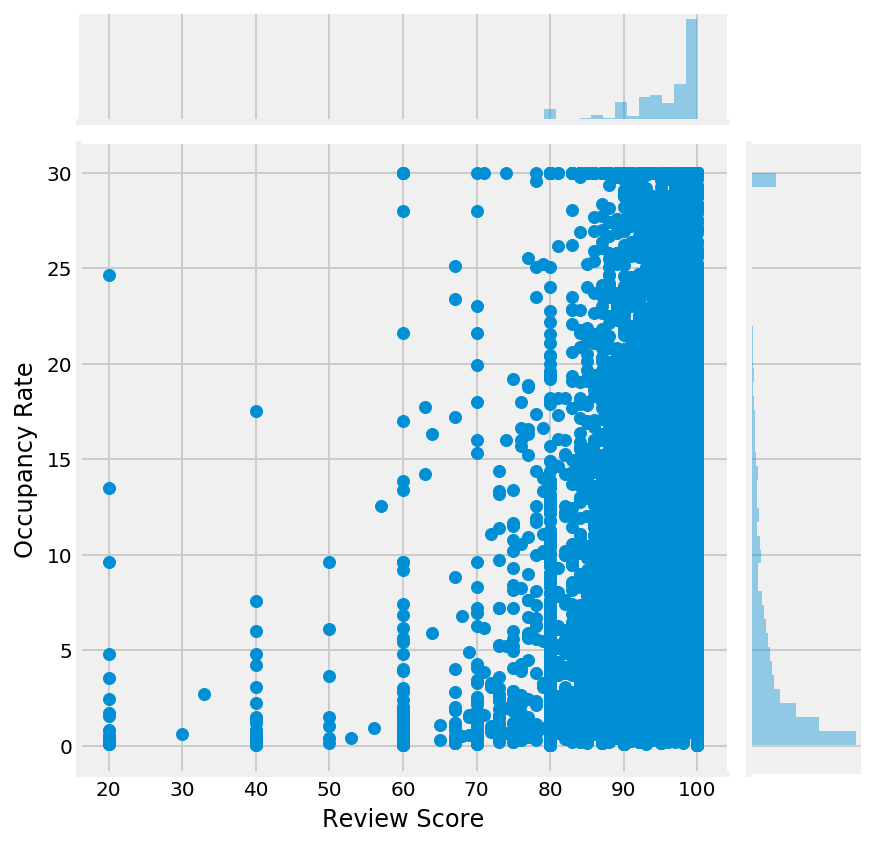

In [58]:
sns.jointplot(x = listings_clean.review_scores_rating,y=occupancy_rate).set_axis_labels("Review Score","Occupancy Rate")
plt.show()


In [59]:
listings_clean.drop(columns='index',inplace=True)

### The listings

In [60]:
listings_clean.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_is_superhost,host_total_listings_count,host_verifications,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,last_to_first_review
0,2015,https://www.airbnb.com/rooms/2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",2217,1.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60.0,200.0,30.0,1,28.0,4,1125,1,0,21,51,141,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,0,0,strict_14_with_grace_period,0,0,3.76,930 days
1,2695,https://www.airbnb.com/rooms/2695,Prenzlauer Berg close to Mauerpark,,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,,,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,,,2986,0.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,0.0,0.0,1,0.0,2,40,1,0,0,0,0,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,flexible,0,0,1.42,89 days
2,3176,https://www.airbnb.com/rooms/3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",3718,0.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",Pankow,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,200.0,50.0,2,20.0,62,1125,1,0,0,0,220,143,2009-06-20,2017-03-20,92.0,9.0,9.0,9.0,9.0,10.0,9.0,1,0,strict_14_with_grace_period,0,0,1.25,2830 days
3,3309,https://www.airbnb.com/rooms/3309,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,"My flat is in the middle of West-Berlin, direc...",The flat is a strictly non-smoking facility! A...,The public transportation is excellent: Severa...,I do have a strictly non-smoker-flat. Keep th...,I'm working as a freelancing photographer. My ...,House-Rules and Information ..............(deu...,4108,0.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,250.0,30.0,1,18.0,5,360,1,0,0,22,297,25,2013-08-12,2018-08-16,88.0,9

### The Reviews

In [61]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


## The Target

In [62]:
occupancy_rate[:5]

0    30.00
1     5.68
2    30.00
3     3.90
4     7.00
dtype: float64